In [14]:
import numpy as np 
import matplotlib.pyplot as plt

# Compute distance between each pair of the two collections of inputs
from scipy.spatial.distance import cdist
np.random.seed(1)

In [15]:
means = [[1, 1], [5, 4]]
cov = [[.5, .3], [.3, .5]]
N = 20
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X = np.vstack((X0, X1)).T
y = np.hstack((np.ones((1, N)), -1*np.ones((1, N))))

In [16]:
from cvxopt import matrix, solvers
# build K
V = np.vstack((X0, -X1)).T
K = matrix(V.T.dot(V))

p = matrix(-np.ones((2*N, 1)))
# build A, b, G, h 
G = matrix(-np.eye(2*N))
h = matrix(np.zeros((2*N, 1)))
A = matrix(y) 
b = matrix(np.zeros((1, 1))) 
solvers.options['show_progress'] = False
sol = solvers.qp(K, p, G, h, A, b)

alpha = np.array(sol['x'])
print('alpha = \n', alpha.T)

alpha = 
 [[3.65499256e-11 3.42920028e-09 9.93762047e-11 3.58936165e-11
  6.88716585e-11 5.52013549e-11 1.61932498e-10 5.14402599e-11
  1.92150295e-10 6.39015783e-11 1.81158769e-10 3.95295240e-11
  5.26558960e-11 1.82316190e-10 8.53343638e-11 5.95884807e-10
  3.54640533e-08 2.35331429e-10 3.30813550e-01 2.85935951e-11
  3.93594879e-11 5.36657100e-11 4.66338765e-11 1.83408344e-10
  7.09641033e-11 5.85700831e-11 3.06257549e-11 5.50930695e-11
  2.93674901e-10 9.44457510e-11 4.78634464e-11 7.03707378e-11
  7.51624247e-11 1.43593234e-05 3.30799231e-01 2.74799803e-11
  8.19228403e-11 3.92896161e-11 5.54639576e-11 8.36484108e-11]]


In [17]:
# Finding support vector
epsilon = 1e-5 # just a small number, greater than 1e-9
S = np.where(alpha > epsilon)[0]
alphaS = alpha[S]

In [18]:
alphaS

array([[3.30813550e-01],
       [1.43593234e-05],
       [3.30799231e-01]])

In [19]:
VS = V[:, S]
XS = X[:, S]
yS = y[:, S]
# calculate w and b
### your code is here
w = VS.dot(alphaS)
b = np.mean(yS.T - w.T.dot(XS))
###########


print('w = ', w.T)
print('b = ', b)

w =  [[-0.80281855 -0.13080407]]
b =  2.5444120388856324


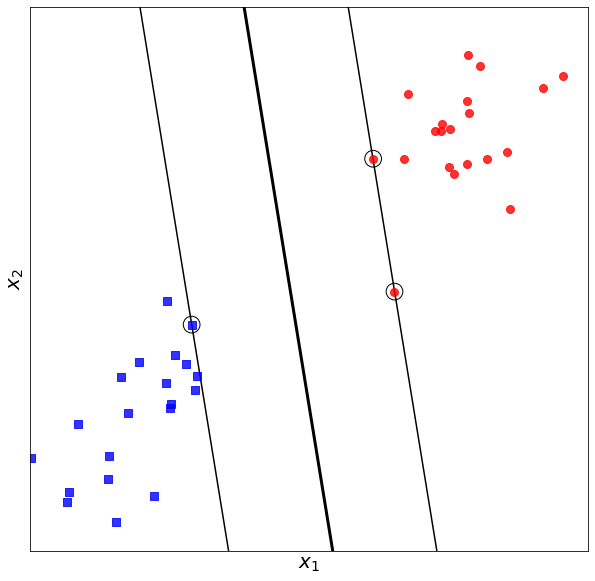

In [20]:
def plot(w, b, X0, X1, X, S):
  fig, ax = plt.subplots(figsize=(10,10))
  x1 = np.arange(-10, 10, 0.1)
  y1 = -w[0, 0]/w[1, 0]*x1 - b/w[1, 0]
  y2 = -w[0, 0]/w[1, 0]*x1 - (b-1)/w[1, 0]
  y3 = -w[0, 0]/w[1, 0]*x1 - (b+1)/w[1, 0]
  plt.plot(x1, y1, 'k', linewidth = 3)
  plt.plot(x1, y2, 'k')
  plt.plot(x1, y3, 'k')


  # y4 = 10*x1
  # plt.plot(x1, y1, 'k')
  # plt.fill_between(x1, y1, color='red', alpha=0.1)
  # plt.fill_between(x1, y1, y4, color = 'blue', alpha = .1)


  plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
  plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)

  plt.axis('equal')
  plt.ylim(np.min(X[1, :])*1.05, np.max(X[1, :])*1.05)
  plt.xlim(np.min(X[0, :])*1.05, np.max(X[0, :])*1.05)

  # hide tikcs 
  cur_axes = plt.gca()
  cur_axes.axes.get_xaxis().set_ticks([])
  cur_axes.axes.get_yaxis().set_ticks([])

  # add circles around support vectors 
  for m in S:
      circle = plt.Circle((X[0, m], X[1, m] ), 0.1, color='k', fill = False)
      ax.add_artist(circle)


  plt.xlabel('$x_1$', fontsize = 20)
  plt.ylabel('$x_2$', fontsize = 20)
  plt.show()
plot(w, b, X0, X1, X, S)